In [1]:
import numpy as np
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm
# from sklearn.neighbors import KernelDensity

from astropy.visualization import hist

In [2]:
N=10000
chi=np.random.uniform(0,1,N)
xgrid=np.linspace(0,1,1000)
M=norm(loc=1, scale=0.02).rvs(size=N)


In [3]:
def M_irr(chi,M):
    """
    Calculate the M_irr value based on chi and M.
    """
    M_irr=M*np.sqrt((1+np.sqrt(1-chi**2))/2)
    return M_irr



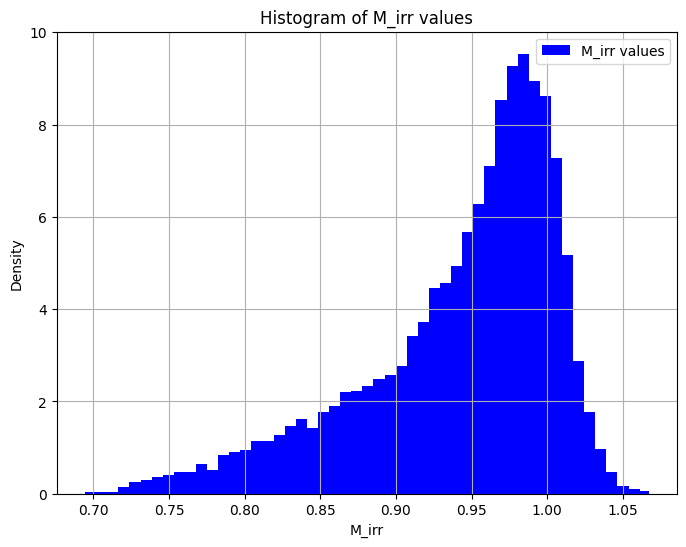

In [4]:
M_irr_values=M_irr(chi,M)

# Plotting the histogram of M_irr values
from astroML import stats as astroMLstats
sigmaG2 = astroMLstats.sigmaG(M_irr_values)
binsize=2.7*sigmaG2/(N**(1/3)) #Freedman-Diaconis rule for bin size
binsG = np.append(np.arange(start=M_irr_values.min(), stop=M_irr_values.max(), step=binsize) , M_irr_values.max())
plt.figure(figsize=(8, 6))
hist(M_irr_values, bins=binsG, density=True, label='M_irr values', color='blue')
plt.xlabel('M_irr')
plt.ylabel('Density')
plt.title('Histogram of M_irr values')
plt.legend()
plt.grid()
plt.show()

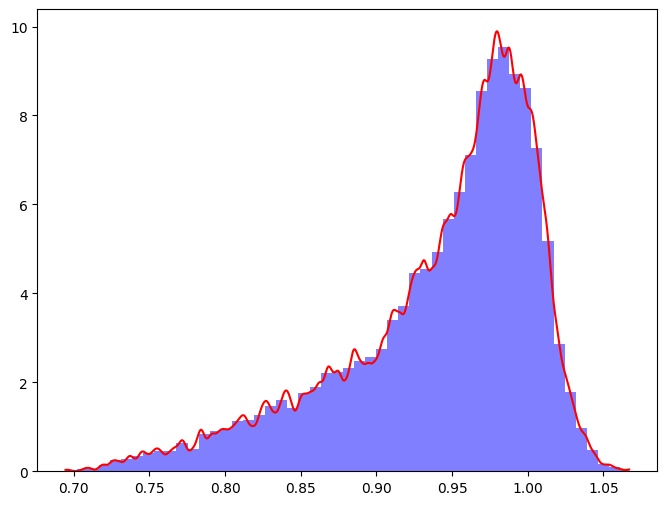

In [5]:
#computing the KDE
# Load the KDE module
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(M_irr_values.min(),M_irr_values.max(),N)  

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)


# Calculate the KDE
kde_values = kde_sklearn(M_irr_values, bandwidth=0.002, kernel="gaussian")

# Plotting the histogram and KDE together
plt.figure(figsize=(8, 6))
plt.hist(M_irr_values, bins=binsG, density=True, label='M_irr values', color='blue', alpha=0.5)
plt.plot(xgrid, kde_values, label='KDE', color='red')           

In [6]:
def f(chi):
    return np.sqrt((1+np.sqrt(1-chi**2))/2)



In [7]:
chi=np.random.uniform(0,1,N)
f_=f(chi)

(array([5.48485473e-02, 2.74242736e-02, 1.37121368e-01, 5.48485473e-02,
        1.09697095e-01, 1.37121368e-01, 2.74242736e-01, 1.91969916e-01,
        3.01667010e-01, 2.74242736e-01, 2.46818463e-01, 4.11364105e-01,
        4.11364105e-01, 4.11364105e-01, 7.13031115e-01, 5.48485473e-01,
        4.11364105e-01, 5.75909747e-01, 5.48485473e-01, 8.22728209e-01,
        7.40455388e-01, 8.50152483e-01, 7.95303936e-01, 1.06954667e+00,
        5.75909747e-01, 9.59849578e-01, 1.12439522e+00, 1.31636514e+00,
        7.95303936e-01, 1.15181949e+00, 1.31636514e+00, 1.17924377e+00,
        1.23409231e+00, 1.23409231e+00, 1.56318360e+00, 1.23409231e+00,
        1.42606223e+00, 1.48091078e+00, 1.39863796e+00, 1.78257779e+00,
        1.83742633e+00, 1.89227488e+00, 1.64545642e+00, 2.08424480e+00,
        2.19394189e+00, 1.64545642e+00, 2.38591181e+00, 2.35848753e+00,
        2.82470019e+00, 2.57788172e+00, 2.46818463e+00, 2.76985164e+00,
        2.79727591e+00, 2.22136617e+00, 3.20864002e+00, 4.058792

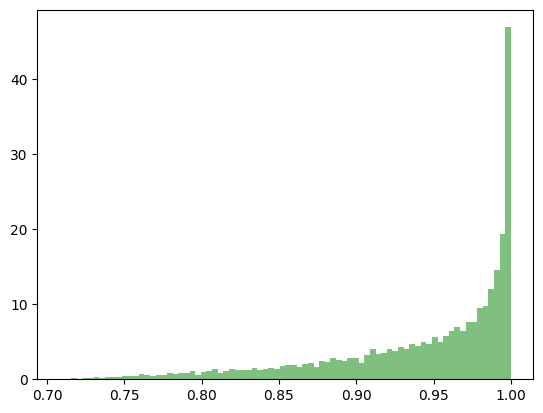

In [8]:
# Plotting the histogram of f(chi) values
plt.hist(f_, bins=80, density=True, label='f(chi)', color='green', alpha=0.5)

In [9]:
print(stats.ks_2samp(stats.t.rvs(df=100, size=10000), stats.t.rvs(df=100, size=100)))

KstestResult(statistic=0.0772, pvalue=0.5705060274938674, statistic_location=-0.2580146750972579, statistic_sign=-1)


In [10]:
print(stats.kstest(M_irr_values, f_))

KstestResult(statistic=0.1578, pvalue=5.130881849372382e-109, statistic_location=0.9999999998317187, statistic_sign=-1)


In [11]:
sigma_values = np.logspace(-7, 2, 100)
p_value=[]
for sigma in sigma_values:
    M= norm(loc=1, scale=sigma).rvs(size=N)
    M_irr_values = M_irr(chi, M)
    ks= stats.kstest(M_irr_values, f_)
    print(f"Sigma: {sigma}, KS Statistic: {ks.statistic}, p-value: {ks.pvalue}")    
    p_value.append(ks.pvalue)



Sigma: 1e-07, KS Statistic: 0.0005, p-value: 1.0
Sigma: 1.232846739442066e-07, KS Statistic: 0.0004, p-value: 1.0
Sigma: 1.519911082952933e-07, KS Statistic: 0.0005, p-value: 1.0
Sigma: 1.873817422860383e-07, KS Statistic: 0.0006, p-value: 0.9999999999999999
Sigma: 2.310129700083158e-07, KS Statistic: 0.0006, p-value: 0.9999999999999999
Sigma: 2.848035868435805e-07, KS Statistic: 0.0005, p-value: 1.0
Sigma: 3.5111917342151277e-07, KS Statistic: 0.0009, p-value: 1.0
Sigma: 4.3287612810830616e-07, KS Statistic: 0.0009, p-value: 1.0
Sigma: 5.336699231206313e-07, KS Statistic: 0.0011, p-value: 1.0
Sigma: 6.579332246575682e-07, KS Statistic: 0.0015, p-value: 1.0
Sigma: 8.111308307896872e-07, KS Statistic: 0.0007, p-value: 1.0
Sigma: 1e-06, KS Statistic: 0.0013, p-value: 1.0
Sigma: 1.232846739442066e-06, KS Statistic: 0.0017, p-value: 1.0
Sigma: 1.519911082952933e-06, KS Statistic: 0.0013, p-value: 1.0
Sigma: 1.873817422860383e-06, KS Statistic: 0.0016, p-value: 1.0
Sigma: 2.310129700083158e

/Users/daniele/kerasenv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:394: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return hypotest_fun_in(*args, **kwds)


Sigma: 0.0001, KS Statistic: 0.0125, p-value: 0.41538042565668437
Sigma: 0.0001232846739442066, KS Statistic: 0.0119, p-value: 0.4784083389368079
Sigma: 0.00015199110829529347, KS Statistic: 0.0162, p-value: 0.1449137168873294
Sigma: 0.0001873817422860385, KS Statistic: 0.0175, p-value: 0.09353139411912735
Sigma: 0.00023101297000831605, KS Statistic: 0.0199, p-value: 0.03811973702041487
Sigma: 0.0002848035868435802, KS Statistic: 0.0196, p-value: 0.042915742476880514
Sigma: 0.0003511191734215131, KS Statistic: 0.0221, p-value: 0.01512953257863315
Sigma: 0.00043287612810830614, KS Statistic: 0.0249, p-value: 0.00405711323877029
Sigma: 0.0005336699231206312, KS Statistic: 0.0277, p-value: 0.000929977128997009
Sigma: 0.0006579332246575682, KS Statistic: 0.0339, p-value: 2.038767400805926e-05
Sigma: 0.0008111308307896872, KS Statistic: 0.036, p-value: 4.695033861901312e-06
Sigma: 0.001, KS Statistic: 0.0385, p-value: 7.285022540143347e-07
Sigma: 0.0012328467394420659, KS Statistic: 0.044, 

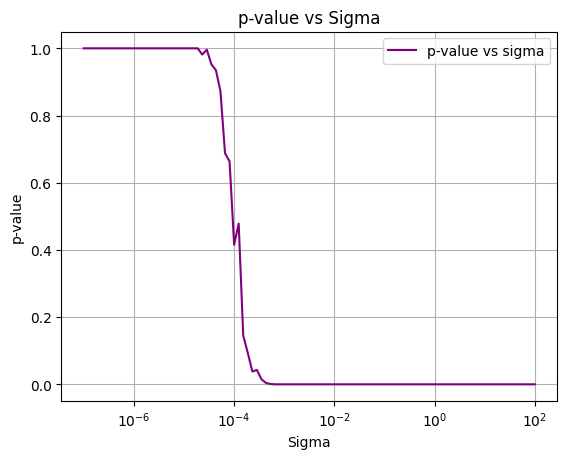

In [14]:
plt.plot(sigma_values, p_value, label='p-value vs sigma', color='purple')
plt.xscale('log')
plt.xlabel('Sigma')
plt.ylabel('p-value')
plt.title('p-value vs Sigma')
plt.legend()
plt.grid()

Sigma: 1e-05, KS Statistic: 0.9838, p-value: 0.0
Sigma: 1.0716676480328643e-05, KS Statistic: 0.9824, p-value: 0.0
Sigma: 1.148471547840289e-05, KS Statistic: 0.9817, p-value: 0.0
Sigma: 1.2307798025066658e-05, KS Statistic: 0.9819, p-value: 0.0
Sigma: 1.3189868961986692e-05, KS Statistic: 0.9812, p-value: 0.0
Sigma: 1.4135155848353956e-05, KS Statistic: 0.98, p-value: 0.0
Sigma: 1.5148189222583474e-05, KS Statistic: 0.9793, p-value: 0.0
Sigma: 1.623382431612278e-05, KS Statistic: 0.9798, p-value: 0.0
Sigma: 1.7397264323438025e-05, KS Statistic: 0.9779, p-value: 0.0
Sigma: 1.8644085339704853e-05, KS Statistic: 0.9765, p-value: 0.0
Sigma: 1.9980263085725506e-05, KS Statistic: 0.9759, p-value: 0.0
Sigma: 2.1412201548157315e-05, KS Statistic: 0.9752, p-value: 0.0
Sigma: 2.294676367231936e-05, KS Statistic: 0.9747, p-value: 0.0
Sigma: 2.4591304254680463e-05, KS Statistic: 0.9725, p-value: 0.0
Sigma: 2.6353705192673932e-05, KS Statistic: 0.9726, p-value: 0.0
Sigma: 2.8242413260784356e-05, K

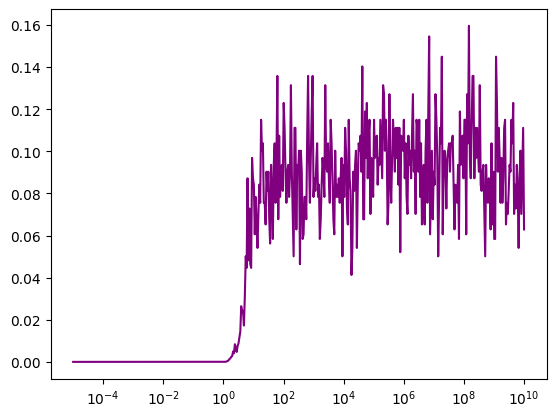

In [145]:
sigma_values = np.logspace(-5, 10, 500)
p_value=[]
for sigma in sigma_values:
    M= norm(loc=1, scale=sigma).rvs(size=N)
    M_irr_values = M_irr(chi, M)
    ks= stats.kstest(M_irr_values, M)
    print(f"Sigma: {sigma}, KS Statistic: {ks.statistic}, p-value: {ks.pvalue}")    
    p_value.append(ks.pvalue)

plt.plot(sigma_values, p_value, label='p-value vs sigma', color='purple')
plt.xscale('log')

ompute the pdfs of $M_{irr}$
 from their mathematical definitions, plot them, and check they agree with your KDE.

/var/folders/v7/_tx6hlfs4ld_lypv8yt_49xh0000gp/T/ipykernel_55159/2307093475.py:22: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, f_min, f_max, args=(Mirr_v,))


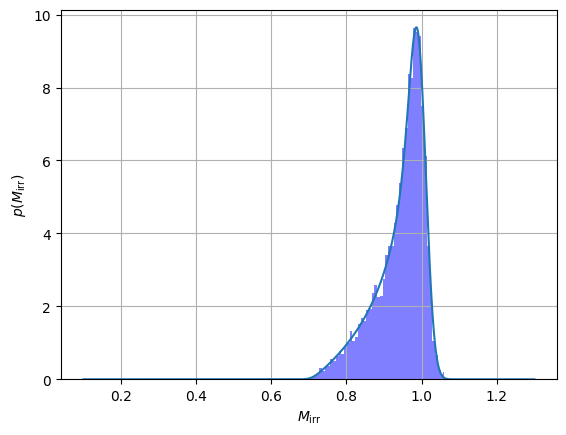

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm

mu = 1.0
sigma = 0.02

f_min = 1 / np.sqrt(2)
f_max = 1.0

def integrand(f, Mirr_V):
    return np.exp(-(Mirr_V/f-mu)**2 / (2*sigma**2))* (2*f**2-1)/(f*(1-f**2)**0.5)


def p_Mirr(Mirr_v):
    result, _ = quad(integrand, f_min, f_max, args=(Mirr_v,))
    return result * (2/np.pi)**0.5/sigma  

Mirr_vals = np.linspace(0.1, 1.3, 1000)
pdf_vals = [p_Mirr(m) for m in Mirr_vals]

plt.plot(Mirr_vals, pdf_vals)
plt.xlabel(r'$M_{\mathrm{irr}}$')
plt.ylabel(r'$p(M_{\mathrm{irr}})$')
plt.grid(True)
M_irr_values=M_irr(chi,M)
plt.hist(M_irr_values, bins=binsG, density=True, label='M_irr values', color='blue', alpha=0.5)
plt.show()
